# Question 1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/drive


In [ ]:
data=np.loadtxt('/content/drive/My Drive/Prnn_data_group_1/regression_data_multilinear_group_1_train.txt',skiprows=1)
data

array([[-6.10917124e-01,  3.73219733e-01, -2.28006326e-01, ...,
        -2.34542755e+00,  3.29955405e+00,  1.62789607e+00],
       [-2.77618467e-01,  7.70720130e-02, -2.13966141e-02, ...,
         2.17936267e+00,  1.64536606e+00,  1.06428317e+01],
       [-7.71906157e-01,  5.95839115e-01, -4.59931882e-01, ...,
        -2.09838479e+01,  1.27342128e+01, -2.91770635e+01],
       ...,
       [ 6.48188573e-01,  4.20148426e-01,  2.72335408e-01, ...,
        -1.82275559e+01,  3.16555258e+00, -1.68285937e+01],
       [-1.20455575e+00,  1.45095457e+00, -1.74775567e+00, ...,
        -1.93259642e+01,  2.30821125e+01, -1.57560080e+01],
       [-1.32994949e+00,  1.76876564e+00, -2.35236896e+00, ...,
        -6.30220229e+00,  2.11643968e+01,  2.48572208e+01]])

In [ ]:
data.shape

(14000, 13)

In [ ]:
x_mean = np.mean(data)
x_std = np.std(data)
data = (data - x_mean) / x_std
data

array([[-0.10447426,  0.05203539, -0.04357903, ..., -0.38031761,
         0.51741736,  0.25156958],
       [-0.05146897,  0.00493831, -0.0107214 , ...,  0.33927063,
         0.25434787,  1.68523641],
       [-0.13007673,  0.08743908, -0.08046271, ..., -3.34443033,
         2.01783377, -4.64741706],
       ...,
       [ 0.09576434,  0.05949857,  0.03599151, ..., -2.9060906 ,
         0.49610678, -2.68361028],
       [-0.19888203,  0.22343015, -0.28526842, ..., -3.08077309,
         3.6634851 , -2.5130344 ],
       [-0.2188237 ,  0.2739724 , -0.38142152, ..., -1.00957299,
         3.35850616,  3.94578483]])

In [ ]:
X=data[:, :10]
Y=data[:, 10:]
X,Y

(array([[-0.10447426,  0.05203539, -0.04357903, ..., -0.04668009,
         -0.05004635,  0.01878445],
        [-0.05146897,  0.00493831, -0.0107214 , ..., -0.02406304,
         -0.08971505,  0.01555612],
        [-0.13007673,  0.08743908, -0.08046271, ...,  0.12230773,
         -0.23704328,  0.17000722],
        ...,
        [ 0.09576434,  0.05949857,  0.03599151, ...,  0.07396734,
          0.14524167,  0.09156921],
        [-0.19888203,  0.22343015, -0.28526842, ...,  0.16855817,
         -0.11860728,  0.12673473],
        [-0.2188237 ,  0.2739724 , -0.38142152, ..., -0.33018686,
         -0.28596896,  0.3632722 ]]),
 array([[-0.38031761,  0.51741736,  0.25156958],
        [ 0.33927063,  0.25434787,  1.68523641],
        [-3.34443033,  2.01783377, -4.64741706],
        ...,
        [-2.9060906 ,  0.49610678, -2.68361028],
        [-3.08077309,  3.6634851 , -2.5130344 ],
        [-1.00957299,  3.35850616,  3.94578483]]))

In [ ]:
n_samples = X.shape[0]
bias = np.ones((n_samples, 1))
X = np.concatenate([X, bias], axis=1)
X

array([[-0.10447426,  0.05203539, -0.04357903, ..., -0.05004635,
         0.01878445,  1.        ],
       [-0.05146897,  0.00493831, -0.0107214 , ..., -0.08971505,
         0.01555612,  1.        ],
       [-0.13007673,  0.08743908, -0.08046271, ..., -0.23704328,
         0.17000722,  1.        ],
       ...,
       [ 0.09576434,  0.05949857,  0.03599151, ...,  0.14524167,
         0.09156921,  1.        ],
       [-0.19888203,  0.22343015, -0.28526842, ..., -0.11860728,
         0.12673473,  1.        ],
       [-0.2188237 ,  0.2739724 , -0.38142152, ..., -0.28596896,
         0.3632722 ,  1.        ]])

In [ ]:
X_train,X_test,Y_train,Y_test=X[:10000],X[10000:],Y[:10000],Y[10000:]
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((10000, 11), (4000, 11), (10000, 3), (4000, 3))

# Method 1

In [ ]:
# Create Model
W_Bias=np.dot(np.dot(np.linalg.inv(np.dot(X_train.T,X_train)),X_train.T),Y_train)
W=W_Bias[:-1]
Bias=W_Bias[-1]
W,Bias

(array([[ 2.25041206, -2.88191621,  1.92906808],
        [-4.99001787,  3.87861237,  3.69627876],
        [-1.98015899, -4.76770569,  3.94555142],
        [-3.48090753,  1.78345452, -4.14389257],
        [-4.11277192, -0.79209013, -4.63417289],
        [-3.14176135,  0.5946485 , -3.30276122],
        [-1.4996626 , -3.59976152,  3.80961854],
        [-1.08170714, -3.08437478, -4.00052258],
        [ 0.27786476,  2.96388932, -0.72698386],
        [-0.75929803,  4.6289082 ,  4.63582934]]),
 array([-0.27237843,  0.26992837, -0.28530225]))

In [ ]:
Y_pred1=np.dot(X_test,W_Bias)
Y_pred1

array([[-0.77112431,  1.60005375,  1.67144148],
       [ 0.14730078,  0.07681575, -0.01613   ],
       [-2.97593221,  1.91314761, -3.20423734],
       ...,
       [-3.17377012,  0.57151238, -2.01547161],
       [-2.29615178,  3.51018496, -2.62795131],
       [-1.12007446,  4.14041143,  3.57834604]])

In [ ]:
error=Y_test-Y_pred1
RSS=np.sum(error**2,axis=0)
MSE=RSS/len(Y_test)
MSE

array([0.21712484, 0.21700828, 0.21377113])

In [ ]:
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

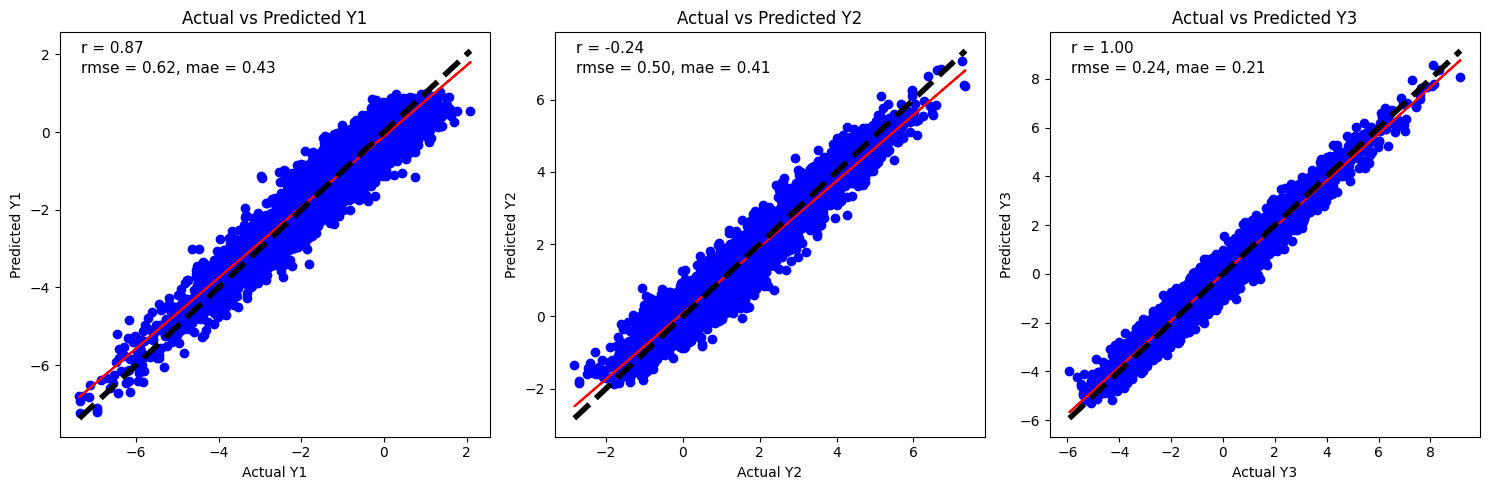

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(axs):
    ax.scatter(Y_test[:, i], Y_pred1[:, i], color='blue')
    ax.set_title(f'Actual vs Predicted Y{i+1}')
    ax.set_xlabel(f'Actual Y{i+1}')
    ax.set_ylabel(f'Predicted Y{i+1}')

    corr = np.corrcoef(Y_test[i], Y_pred1[i])[0, 1]
    rmse = np.sqrt(np.mean((Y_test[i] - Y_pred1[i]) ** 2))
    mae = np.mean(np.abs(Y_test[i] - Y_pred1[i]))
    ax.annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
    ax.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)

    # Red Line(Best Fit)
    slope, intercept = compute_best_fit_line(Y_test[:, i], Y_pred1[:, i])
    ax.plot(Y_test[:, i], slope * Y_test[:, i] + intercept, color='red')
    # Black Line
    ax.plot([Y_test[:, i].min(), Y_test[:, i].max()], [Y_test[:, i].min(), Y_test[:, i].max()], 'k--', lw=4)
plt.tight_layout()
plt.show()


# Method 2(Using Gradient Descents)

In [ ]:
# create model to find_out Wieght and Bais using Gradients Desent
def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(X_train, Y_train, learning_rate=0.01, n_iterations=10000)

def predict(x):
    return x @ W


In [ ]:
Y_pred=predict(X_test)
Y_pred

array([[-0.69410546,  1.67766375,  1.56742129],
       [-0.09520136,  0.16606119, -0.12296823],
       [-2.83306503,  1.93869414, -3.14525741],
       ...,
       [-3.14988918,  0.50825263, -1.85756667],
       [-2.20095253,  3.42599971, -2.51411059],
       [-1.21752109,  4.10693337,  3.35590484]])

In [ ]:
error=Y_test-Y_pred
RSS=np.sum(error**2,axis=0)
MSE=RSS/len(Y_test)
MSE

array([0.24082861, 0.233515  , 0.2307915 ])

In [ ]:
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept

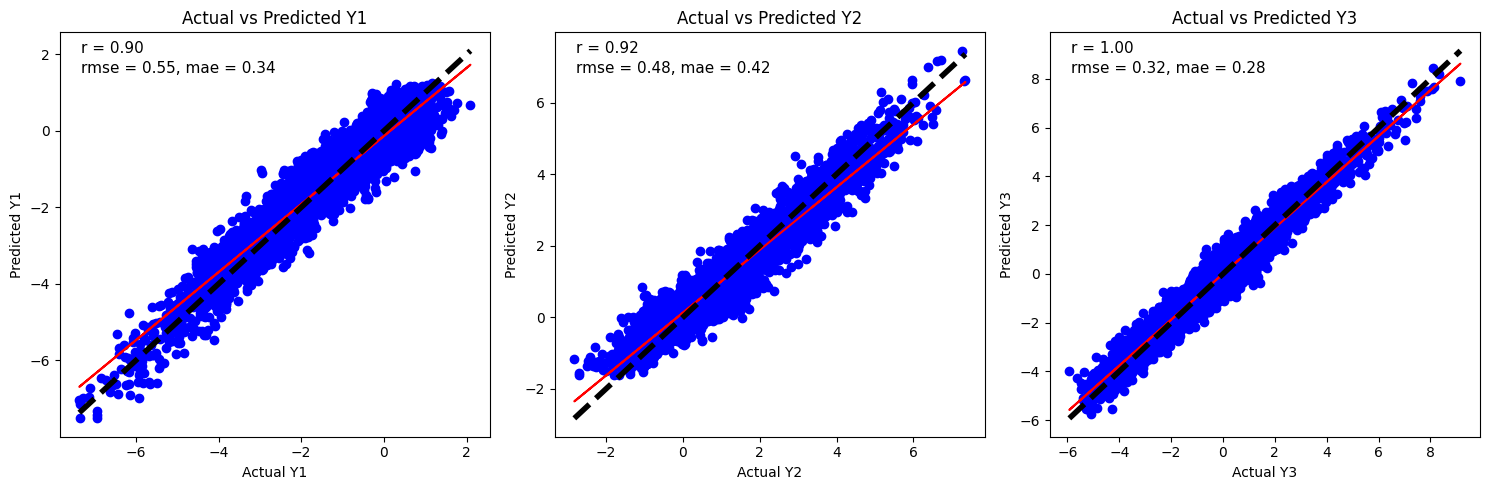

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
for i, ax in enumerate(axs):
    ax.scatter(Y_test[:, i], Y_pred[:, i], color='blue')
    ax.set_title(f'Actual vs Predicted Y{i+1}')
    ax.set_xlabel(f'Actual Y{i+1}')
    ax.set_ylabel(f'Predicted Y{i+1}')

    corr = np.corrcoef(Y_test[i], Y_pred[i])[0, 1]
    rmse = np.sqrt(np.mean((Y_test[i] - Y_pred[i]) ** 2))
    mae = np.mean(np.abs(Y_test[i] - Y_pred[i]))
    ax.annotate(f'r = {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
    ax.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}', xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)

    # Red Line(Best Fit)
    slope, intercept = compute_best_fit_line(Y_test[:, i], Y_pred[:, i])
    ax.plot(Y_test[:, i], slope * Y_test[:, i] + intercept, color='red')
    # Black Line
    ax.plot([Y_test[:, i].min(), Y_test[:, i].max()], [Y_test[:, i].min(), Y_test[:, i].max()], 'k--', lw=4)
plt.tight_layout()
plt.show()


# Questions 3

In [ ]:
data2=np.loadtxt('/content/drive/My Drive/Prnn_data_group_1/regression_data_uni_group_1_train.txt' ,skiprows=1)
data2

array([[-1.23736775, -0.94492578,  0.54006185,  0.3272847 , -0.84162533,
         0.62418383],
       [ 0.8881525 ,  0.77590758,  0.45923619,  0.6308466 , -0.8883142 ,
         0.95569175],
       [-0.68225591, -0.63054555, -0.88884805,  0.77615224, -0.45820208,
         0.00981184],
       ...,
       [ 1.2854311 ,  0.9595589 , -0.65539135,  0.28150792, -0.75528947,
         0.33901735],
       [-0.73872656, -0.67334697, -0.79886924,  0.73932663, -0.60150473,
         0.00394303],
       [ 1.22869028,  0.94205023, -0.51797179,  0.33547184, -0.8553977 ,
         0.7585291 ]])

In [ ]:
x_data=data2[:, :5]
y_data=data2[:, 5:]
x_data,y_data

(array([[-1.23736775, -0.94492578,  0.54006185,  0.3272847 , -0.84162533],
        [ 0.8881525 ,  0.77590758,  0.45923619,  0.6308466 , -0.8883142 ],
        [-0.68225591, -0.63054555, -0.88884805,  0.77615224, -0.45820208],
        ...,
        [ 1.2854311 ,  0.9595589 , -0.65539135,  0.28150792, -0.75528947],
        [-0.73872656, -0.67334697, -0.79886924,  0.73932663, -0.60150473],
        [ 1.22869028,  0.94205023, -0.51797179,  0.33547184, -0.8553977 ]]),
 array([[0.62418383],
        [0.95569175],
        [0.00981184],
        ...,
        [0.33901735],
        [0.00394303],
        [0.7585291 ]]))

In [ ]:
n_samples = x_data.shape[0]
bias = np.ones((n_samples, 1))
x_data = np.concatenate([x_data, bias], axis=1)
x_data

array([[-1.23736775, -0.94492578,  0.54006185,  0.3272847 , -0.84162533,
         1.        ],
       [ 0.8881525 ,  0.77590758,  0.45923619,  0.6308466 , -0.8883142 ,
         1.        ],
       [-0.68225591, -0.63054555, -0.88884805,  0.77615224, -0.45820208,
         1.        ],
       ...,
       [ 1.2854311 ,  0.9595589 , -0.65539135,  0.28150792, -0.75528947,
         1.        ],
       [-0.73872656, -0.67334697, -0.79886924,  0.73932663, -0.60150473,
         1.        ],
       [ 1.22869028,  0.94205023, -0.51797179,  0.33547184, -0.8553977 ,
         1.        ]])

# Using Sigmoid Kernal

In [ ]:
x_data_1=np.zeros(x_data.shape)
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

for i in range(len(y_data)):
  for j in range(5):
    x_data_1[i][j]=sigmoid(x_data[i][j])

x_data_1

array([[0.2248945 , 0.27990643, 0.63182681, 0.58109856, 0.30119258,
        0.        ],
       [0.70850877, 0.68479743, 0.61283296, 0.6526814 , 0.29145784,
        0.        ],
       [0.33575799, 0.34738685, 0.29134761, 0.68485024, 0.38741243,
        0.        ],
       ...,
       [0.78337285, 0.72303348, 0.34177564, 0.56991587, 0.31966985,
        0.        ],
       [0.32328267, 0.3377478 , 0.31026745, 0.67684859, 0.35399951,
        0.        ],
       [0.77358926, 0.71951361, 0.37332662, 0.58309016, 0.29830179,
        0.        ]])

In [ ]:
x_data_train,x_data_test,y_data_train,y_data_test=x_data_1[:5000],x_data_1[5000:],y_data[:5000],y_data[5000:]
x_data_train.shape,x_data_test.shape,y_data_train.shape,y_data_test.shape

((5000, 6), (2000, 6), (5000, 1), (2000, 1))

In [ ]:
def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(x_data_train, y_data_train, learning_rate=0.01, n_iterations=5000)

def predict(x):
    return x @ W

y_data_pred=predict(x_data_test)
y_data_pred,y_data_test

(array([[ 0.5168589 ],
        [ 0.53379183],
        [-0.10126812],
        ...,
        [ 0.31565457],
        [ 0.24113248],
        [ 0.39290005]]),
 array([[6.82370683e-03],
        [4.99326263e-03],
        [1.68145640e-04],
        ...,
        [3.39017352e-01],
        [3.94302627e-03],
        [7.58529101e-01]]))

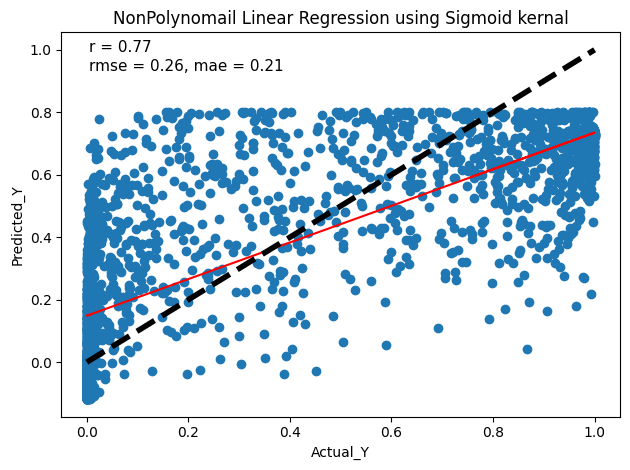

In [ ]:
def compute_best_fit_line(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    slope = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
    intercept = y_mean - slope * x_mean
    return slope, intercept


correlation = np.corrcoef(y_data_test.T, y_data_pred.T)[0, 1]
rmse = np.sqrt(np.mean((y_data_test - y_data_pred) ** 2))
mae = np.mean(np.abs(y_data_test - y_data_pred))
plt.annotate(f'r = {correlation:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
plt.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}',xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)
#Red Line (Best fit)
slope, intercept = compute_best_fit_line(y_data_test, y_data_pred)
plt.plot(y_data_test, slope * y_data_test + intercept, color='red')

#Black Line (Y=x line)
plt.plot([y_data_test.min(), y_data_test.max()], [y_data_test.min(), y_data_test.max()], 'k--', lw=4)
plt.scatter(y_data_test, y_data_pred, label='Data Points')

plt.title(f'NonPolynomail Linear Regression using Sigmoid kernal')
plt.xlabel('Actual_Y')
plt.ylabel('Predicted_Y')
plt.tight_layout()
plt.show()

# Using Exponential Kernal

In [ ]:
def exponential(x, a, b):
    return np.tan(np.arctan(a * np.exp(b * x)-0.5, dtype=np.float64))
    #return a * np.exp(b * x)

x_data_2=np.zeros(x_data.shape)
for i in range(len(y_data)):
  for j in range(5):
    x_data_2[i][j]=exponential(x_data[i][j],1.1,0.1)


x_data_train_2,x_data_test_2,y_data_train_2,y_data_test_2=x_data_2[:5000],x_data_2[5000:],y_data[:5000],y_data[5000:]


def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(x_data_train_2, y_data_train_2, learning_rate=0.01, n_iterations=5000)

def predict(x):
    return x @ W

y_data_pred_2=predict(x_data_test)
y_data_pred_2,y_data_test_2

(array([[ 0.53320658],
        [ 0.50308238],
        [-0.1756164 ],
        ...,
        [ 0.29571923],
        [ 0.12415466],
        [ 0.36732623]]),
 array([[6.82370683e-03],
        [4.99326263e-03],
        [1.68145640e-04],
        ...,
        [3.39017352e-01],
        [3.94302627e-03],
        [7.58529101e-01]]))

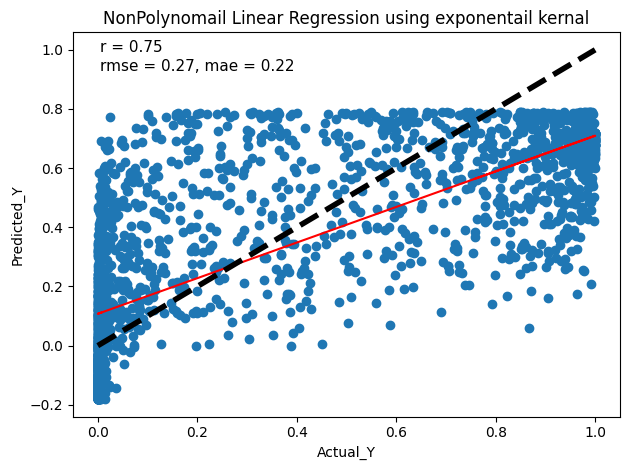

In [ ]:
corr_2 = np.corrcoef(y_data_test_2.T, y_data_pred_2.T)[0, 1]
rmse = np.sqrt(np.mean((y_data_test_2 - y_data_pred_2) ** 2))
mae = np.mean(np.abs(y_data_test_2 - y_data_pred_2))
plt.annotate(f'r = {corr_2:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
plt.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}',xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)
#Red Line (Best fit)
slope, intercept = compute_best_fit_line(y_data_test_2, y_data_pred_2)
plt.plot(y_data_test, slope * y_data_test + intercept, color='red')

#Black Line (Y=x line)
plt.plot([y_data_test_2.min(), y_data_test_2.max()], [y_data_test_2.min(), y_data_test_2.max()], 'k--', lw=4)
plt.scatter(y_data_test_2, y_data_pred_2, label='Data Points')

plt.title(f'NonPolynomail Linear Regression using exponentail kernal')
plt.xlabel('Actual_Y')
plt.ylabel('Predicted_Y')
plt.tight_layout()
plt.show()

# Using Gaussian Kernal

In [ ]:
myu=np.mean(x_data,axis=1)
myu

array([-0.19276205,  0.47763811, -0.14728322, ...,  0.35263619,
       -0.17885348,  0.35547381])

In [ ]:
def gauss_kernel(x, myu, sigma):
    return np.exp(-np.linalg.norm(x - myu)**2 / (2 * sigma**2))

x_data_3=np.zeros(x_data.shape)
for i in range(len(y_data)):
  for j in range(5):
    x_data_3[i][j]=gauss_kernel(x_data[i][j],myu[i],sigma=0.95)


x_data_train_3,x_data_test_3,y_data_train_3,y_data_test_3=x_data_3[:5000],x_data_3[5000:],y_data[:5000],y_data[5000:]


def gradient_descent(x, y, learning_rate, n_iterations):
    n_samples, n_features = x.shape
    W = np.zeros((n_features, y.shape[1]))
    for _ in range(n_iterations):
        gradient = (2/n_samples) * x.T @ (x @ W - y)
        W -= learning_rate * gradient
    return W

W = gradient_descent(x_data_train_3, y_data_train_3, learning_rate=0.05, n_iterations=5000)

def predict(x):
    return x @ W

y_data_pred_3=predict(x_data_test)
y_data_pred_3,y_data_test_3

(array([[ 0.42313869],
        [-0.06566668],
        [ 0.15135822],
        ...,
        [-0.26594844],
        [ 0.33182443],
        [-0.19928215]]),
 array([[6.82370683e-03],
        [4.99326263e-03],
        [1.68145640e-04],
        ...,
        [3.39017352e-01],
        [3.94302627e-03],
        [7.58529101e-01]]))

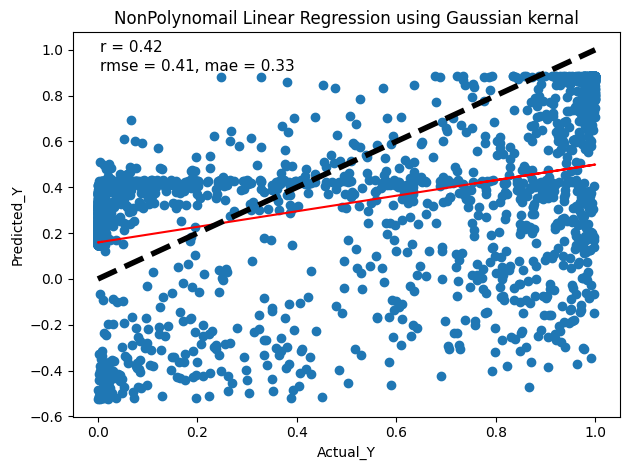

In [ ]:
corr_3 = np.corrcoef(y_data_test_3.T, y_data_pred_3.T)[0, 1]
rmse = np.sqrt(np.mean((y_data_test_3 - y_data_pred_3) ** 2))
mae = np.mean(np.abs(y_data_test_3 - y_data_pred_3))
plt.annotate(f'r = {corr_3:.2f}',xy=(0.05, 0.95), xycoords='axes fraction', fontsize=11)
plt.annotate(f'rmse = {rmse:.2f}, mae = {mae:.2f}',xy=(0.05, 0.9), xycoords='axes fraction', fontsize=11)
#Red Line (Best fit)
slope, intercept = compute_best_fit_line(y_data_test_3, y_data_pred_3)
plt.plot(y_data_test, slope * y_data_test + intercept, color='red')

#Black Line (Y=x line)
plt.plot([y_data_test_3.min(), y_data_test_3.max()], [y_data_test_3.min(), y_data_test_3.max()], 'k--', lw=4)
plt.scatter(y_data_test_2, y_data_pred_3, label='Data Points')

plt.title(f'NonPolynomail Linear Regression using Gaussian kernal')
plt.xlabel('Actual_Y')
plt.ylabel('Predicted_Y')
plt.tight_layout()
plt.show()